<center>
<h2>Data Science Lab on Smart Cities</h2>
<i>Mobility in Northern Sardinia</i>
</center>

In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

<center><h4><b>Optimization</b></h4><center>

<center>
Find gaps in public transports, propose new stops
</center>

In [2]:
# read municipalities data

municipalities_sassari = gpd.read_file('../data/processed/municipalities_sassari.geojson')

print(type(municipalities_sassari))
print('')
print(municipalities_sassari.shape)
print('')
print(municipalities_sassari.columns)

<class 'geopandas.geodataframe.GeoDataFrame'>

(92, 13)

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'COD_CM', 'COD_UTS', 'PRO_COM',
       'PRO_COM_T', 'COMUNE', 'COMUNE_A', 'CC_UTS', 'SHAPE_LENG', 'Shape_Le_1',
       'geometry'],
      dtype='object')


In [3]:
municipalities_sassari = municipalities_sassari[['COMUNE', 'SHAPE_LENG', 'Shape_Le_1', 'geometry']]

In [4]:
municipalities_sassari

,COMUNE,SHAPE_LENG,Shape_Le_1,geometry
0,Banari,22713.497329,22713.321753,"POLYGON ((8.66935 40.60099, 8.66976 40.60086, ..."
1,Burgos,32641.249234,32640.994286,"POLYGON ((8.94247 40.43254, 8.94369 40.43137, ..."
2,Padria,41042.452979,41042.133766,"POLYGON ((8.58662 40.44676, 8.58721 40.44671, ..."
3,Monteleone Rocca Doria,20321.212472,20321.055657,"POLYGON ((8.54566 40.49683, 8.54590 40.49596, ..."
4,Cossoine,41227.178497,41226.858229,"POLYGON ((8.64223 40.47028, 8.64241 40.46987, ..."
...,...,...,...,...
87,Perfugas,44036.970233,44036.632047,"POLYGON ((8.90709 40.85427, 8.90729 40.85424, ..."
88,Mara,21459.511033,21459.343271,"POLYGON ((8.65672 40.46340, 8.65663 40.46293, ..."
89,Siligo,35358.500355,35358.226900,"POLYGON ((8.77099 40.63001, 8.77144 40.62994, ..."
90,Loiri Porto San Paolo,61488.104430,61487.633075,"POLYGON ((9.63533 40.88459, 9.63545 40.88448, ..."


In [5]:
# read stops data

bus_stops_sassari = gpd.read_file('../data/processed/geo_bus_stops_sassari.geojson')

print(type(bus_stops_sassari))
print('')
print(bus_stops_sassari.shape)
print('')
print(bus_stops_sassari.columns)

<class 'geopandas.geodataframe.GeoDataFrame'>

(2653, 7)

Index(['stop_id', 'stop_name', 'stop_lat', 'stop_lon', 'stop_comune',
       'stop_type', 'geometry'],
      dtype='object')


In [6]:
bus_stops_sassari

,stop_id,stop_name,stop_lat,stop_lon,stop_comune,stop_type,geometry
0,ATPSS_455,Fermata di Via De Cupis 32,40.761698,8.500294,SASSARI,Fermata Autobus,POINT (8.50029 40.76170)
1,ASPO1051,Fermata di 1051 - Colcò agraria,40.905960,9.501480,OLBIA,Fermata Autobus,POINT (9.50148 40.90596)
2,ASPO106,Fermata di 106 - Mameli 6,40.922990,9.496510,OLBIA,Fermata Autobus,POINT (9.49651 40.92299)
3,ATPSS_757,Fermata di Via Lobina 7,40.746607,8.538608,SASSARI,Fermata Autobus,POINT (8.53861 40.74661)
4,ATPSS_686,"Fermata di Via Barore Diegu, Ang. Via Branca",40.782744,8.463912,SASSARI,Fermata Autobus,POINT (8.46391 40.78274)
...,...,...,...,...,...,...,...
2648,212004,Fermata di S.Lorenzo,40.681322,9.682058,BUDONI,Fermata Autobus,POINT (9.68206 40.68132)
2649,ASPO903,Fermata di 903 - SS125 Padrongianus,40.902080,9.540240,OLBIA,Fermata Autobus,POINT (9.54024 40.90208)
2650,ASPO2034,Fermata di 2034 - Via San Vittore Lato Via Plebi,40.958100,9.475610,OLBIA,Fermata Autobus,POINT (9.47561 40.95810)
2651,B_7628,Fermata di OLBIA ISTITUTO AGRARIO,40.904933,9.501372,OLBIA,Fermata Autobus,POINT (9.50137 40.90493)


In [7]:
# read population data

population_sassari = pd.read_csv('../data/processed/population_sassari.csv')

print(type(population_sassari))
print('')
print(population_sassari.shape)
print('')
print(population_sassari.columns)

<class 'pandas.core.frame.DataFrame'>

(92, 2)

Index(['Comune', 'Popolazione'], dtype='object')


In [8]:
population_sassari

,Comune,Popolazione
0,Aggius,1403
1,Aglientu,1169
2,Alà dei Sardi,1760
3,Alghero,42380
4,Anela,567
...,...,...
87,Uri,2827
88,Usini,4213
89,Valledoria,4298
90,Viddalba,1597


In [9]:
# read beaches data

beaches_sassari = gpd.read_file('../data/processed/geo_beaches_sassari.geojson')

print(type(beaches_sassari))
print('')
print(beaches_sassari.shape)
print('')
print(beaches_sassari.columns)

<class 'geopandas.geodataframe.GeoDataFrame'>

(127, 6)

Index(['idFeature', 'tipoElCod', 'tipoElDesc', 'latitude', 'longitude',
       'geometry'],
      dtype='object')


In [10]:
beaches_sassari

,idFeature,tipoElCod,tipoElDesc,latitude,longitude,geometry
0,13,6,Sistemi di spiaggia,41.136426,9.435647,POINT (9.43565 41.13643)
1,17,6,Sistemi di spiaggia,41.187522,9.337758,POINT (9.33776 41.18752)
2,63,6,Sistemi di spiaggia,40.584490,8.258521,POINT (8.25852 40.58449)
3,14,6,Sistemi di spiaggia,41.134655,9.437039,POINT (9.43704 41.13466)
4,22,6,Sistemi di spiaggia,41.231125,9.273588,POINT (9.27359 41.23113)
...,...,...,...,...,...,...
122,3275,6,Sistemi di spiaggia,41.250427,9.414158,POINT (9.41416 41.25043)
123,2625,6,Sistemi di spiaggia,41.236142,9.160648,POINT (9.16065 41.23614)
124,3432,6,Sistemi di spiaggia,41.176989,9.171280,POINT (9.17128 41.17699)
125,3434,6,Sistemi di spiaggia,41.241323,9.399335,POINT (9.39934 41.24132)


_Calculate Population Density_

In [11]:
# make sure the GeoDataFrame is in EPSG:4326 CRS (WGS 84)
municipalities_sassari = municipalities_sassari.to_crs(epsg=4326)

In [12]:
# reproject the GeoDataFrame to a suitable projected CRS that uses meters (e.g., UTM Zone 32N, EPSG:32632)
municipalities_sassari = municipalities_sassari.to_crs(epsg=32632)  # UTM Zone 32N

In [13]:
# calculate area for each municipality
municipalities_sassari['Area'] = municipalities_sassari['geometry'].area / 10**6  # convert to square kilometers

In [14]:
mun_pop_gdf = municipalities_sassari.merge(population_sassari, left_on='COMUNE', right_on='Comune', how='left')
mun_pop_gdf['Population_Density'] = mun_pop_gdf['Popolazione'] / mun_pop_gdf['Area']

In [15]:
mun_pop_gdf.head()

,COMUNE,SHAPE_LENG,Shape_Le_1,geometry,Area,Comune,Popolazione,Population_Density
0,Banari,22713.497329,22713.321753,"POLYGON ((472024.694 4494517.709, 472059.693 4...",21.250886,Banari,516,24.281340
1,Burgos,32641.249234,32640.994286,"POLYGON ((495120.515 4475767.856, 495223.515 4...",18.076958,Burgos,855,47.297780
2,Padria,41042.452979,41042.133766,"POLYGON ((464944.750 4477426.841, 464994.749 4...",48.394150,Padria,599,12.377529
3,Monteleone Rocca Doria,20321.212472,20321.055657,"POLYGON ((461499.776 4483001.798, 461519.776 4...",13.385846,Monteleone Rocca Doria,105,7.844106
4,Cossoine,41227.178497,41226.858229,"POLYGON ((469671.713 4480016.822, 469686.713 4...",39.170380,Cossoine,761,19.427946


_Calculate Beach Accessibility_

To calculate the accessibility of each municipality to beaches, you can use spatial analysis techniques like calculating the distance from the centroid of each municipality to the nearest beach.

In [16]:
from shapely.ops import nearest_points
from shapely.geometry import Point

# create a GeoDataFrame with centroids of municipalities
municipalities_centroids = municipalities_sassari.copy()
municipalities_centroids['geometry'] = municipalities_centroids['geometry'].centroid

In [17]:
municipalities_centroids.head(2)

,COMUNE,SHAPE_LENG,Shape_Le_1,geometry,Area
0,Banari,22713.497329,22713.321753,POINT (472500.378 4492191.581),21.250886
1,Burgos,32641.249234,32640.994286,POINT (498393.785 4472175.996),18.076958


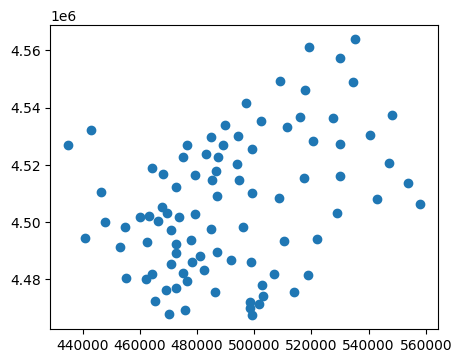

In [18]:
municipalities_centroids.plot(figsize=(5,5))
plt.show()

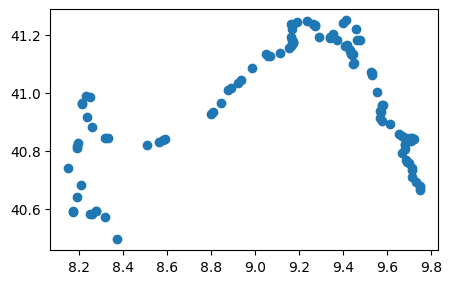

In [19]:
beaches_sassari.plot(figsize=(5,5))
plt.show()

In [20]:
invalid_mun_cen = municipalities_centroids[~municipalities_centroids.geometry.is_valid]
print("Invalid Municipalities Centroids:", invalid_mun_cen.shape)

Invalid Municipalities Centroids: (0, 5)


In [21]:
municipalities_centroids.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
invalid_beaches = beaches_sassari[~beaches_sassari.geometry.is_valid]
print("Invalid Beaches:", invalid_beaches.shape)

Invalid Beaches: (0, 6)


In [23]:
beaches_sassari.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
# reproject the GeoDataFrame to a suitable projected CRS that uses meters (e.g., UTM Zone 32N, EPSG:32632)
beaches_sassari = beaches_sassari.to_crs(epsg=32632)  # UTM Zone 32N

In [25]:
# create a DataFrame to store beach accessibility information
beach_accessibility = pd.DataFrame(columns=['Comune', 'Nearest_Beach_Distance'])

for index, row in municipalities_centroids.iterrows():
    centroid = row['geometry']
    distances = beaches_sassari['geometry'].apply(lambda geom: centroid.distance(geom))
    nearest_distance = distances.min()
    beach_accessibility.loc[index] = {'Comune': row['COMUNE'], 'Nearest_Beach_Distance': nearest_distance}

In [26]:
beach_accessibility.head()

,Comune,Nearest_Beach_Distance
0,Banari,27574.548380
1,Burgos,53033.827011
2,Padria,21453.144285
3,Monteleone Rocca Doria,16047.359596
4,Cossoine,26745.575402


In [27]:
beach_accessibility.sort_values('Nearest_Beach_Distance', ascending=False)

,Comune,Nearest_Beach_Distance
70,Bono,57449.223654
82,Bottidda,56341.481744
71,Anela,56141.585906
16,Benetutti,55863.652437
86,Illorai,54884.486595
...,...,...
8,La Maddalena,2394.183159
28,Palau,2156.079733
10,Alghero,2003.089308
30,Valledoria,1867.407346


In [28]:
# merge the accessibility information back to the marged DataFrame
mun_pop_gdf = mun_pop_gdf.merge(beach_accessibility, left_on='COMUNE', right_on='Comune')

In [29]:
mun_pop_gdf.columns

Index(['COMUNE', 'SHAPE_LENG', 'Shape_Le_1', 'geometry', 'Area', 'Comune_x',
       'Popolazione', 'Population_Density', 'Comune_y',
       'Nearest_Beach_Distance'],
      dtype='object')

In [30]:
mun_pop_gdf = mun_pop_gdf[['COMUNE', 'SHAPE_LENG', 'Shape_Le_1', 'geometry', 'Area',
                            'Popolazione', 'Population_Density', 'Nearest_Beach_Distance']]

In [31]:
mun_pop_gdf.head()

,COMUNE,SHAPE_LENG,Shape_Le_1,geometry,Area,Popolazione,Population_Density,Nearest_Beach_Distance
0,Banari,22713.497329,22713.321753,"POLYGON ((472024.694 4494517.709, 472059.693 4...",21.250886,516,24.281340,27574.548380
1,Burgos,32641.249234,32640.994286,"POLYGON ((495120.515 4475767.856, 495223.515 4...",18.076958,855,47.297780,53033.827011
2,Padria,41042.452979,41042.133766,"POLYGON ((464944.750 4477426.841, 464994.749 4...",48.394150,599,12.377529,21453.144285
3,Monteleone Rocca Doria,20321.212472,20321.055657,"POLYGON ((461499.776 4483001.798, 461519.776 4...",13.385846,105,7.844106,16047.359596
4,Cossoine,41227.178497,41226.858229,"POLYGON ((469671.713 4480016.822, 469686.713 4...",39.170380,761,19.427946,26745.575402


In [32]:
mun_pop_gdf.columns

Index(['COMUNE', 'SHAPE_LENG', 'Shape_Le_1', 'geometry', 'Area', 'Popolazione',
       'Population_Density', 'Nearest_Beach_Distance'],
      dtype='object')

In [33]:
mun_pop_gdf = mun_pop_gdf[['COMUNE', 'geometry', 'Area', 'Popolazione',
       'Population_Density', 'Nearest_Beach_Distance']]

In [34]:
bus_stops_sassari = bus_stops_sassari.to_crs(epsg=32632)

# perform a spatial join to count the number of bus stops in each municipality
bus_stops_count = gpd.sjoin(mun_pop_gdf, bus_stops_sassari, how='left', predicate='contains').groupby('COMUNE')['stop_id'].count().reset_index()
bus_stops_count.columns = ['COMUNE', 'Bus_Stops_Count']

In [50]:
bus_stops_count[bus_stops_count.Bus_Stops_Count == 0]

,COMUNE,Bus_Stops_Count
3,Alà dei Sardi,0
18,Buddusò,0
38,La Maddalena,0
49,Nughedu San Nicolò,0
85,Trinità d'Agultu e Vignola,0


In [35]:
mun_pop_beach_bus = mun_pop_gdf.merge(bus_stops_count, on='COMUNE', how='left')

In [36]:
mun_pop_beach_bus.head()

,COMUNE,geometry,Area,Popolazione,Population_Density,Nearest_Beach_Distance,Bus_Stops_Count
0,Banari,"POLYGON ((472024.694 4494517.709, 472059.693 4...",21.250886,516,24.281340,27574.548380,2
1,Burgos,"POLYGON ((495120.515 4475767.856, 495223.515 4...",18.076958,855,47.297780,53033.827011,3
2,Padria,"POLYGON ((464944.750 4477426.841, 464994.749 4...",48.394150,599,12.377529,21453.144285,2
3,Monteleone Rocca Doria,"POLYGON ((461499.776 4483001.798, 461519.776 4...",13.385846,105,7.844106,16047.359596,1
4,Cossoine,"POLYGON ((469671.713 4480016.822, 469686.713 4...",39.170380,761,19.427946,26745.575402,4


In [37]:
# check for NaN
mun_pop_beach_bus[mun_pop_beach_bus.isna().any(axis=1)]

,COMUNE,geometry,Area,Popolazione,Population_Density,Nearest_Beach_Distance,Bus_Stops_Count


In [38]:
# filter municipalities without bus stops near beaches and with low bus stop counts
filtered_df = mun_pop_beach_bus[
    ((mun_pop_beach_bus['Nearest_Beach_Distance'] >= 40000 ) & (mun_pop_beach_bus['Bus_Stops_Count'] <= 3))
]
filtered_df

,COMUNE,geometry,Area,Popolazione,Population_Density,Nearest_Beach_Distance,Bus_Stops_Count
1,Burgos,"POLYGON ((495120.515 4475767.856, 495223.515 4...",18.076958,855,47.297780,53033.827011,3
59,Nughedu San Nicolò,"POLYGON ((503950.447 4491030.737, 503968.447 4...",67.893790,744,10.958292,47206.072652,0
82,Bottidda,"POLYGON ((494953.517 4479067.830, 494959.517 4...",33.714361,646,19.160974,56341.481744,3
83,Ittireddu,"POLYGON ((490787.549 4490403.742, 490842.548 4...",23.686741,469,19.800107,43432.955201,2
85,Buddusò,"POLYGON ((523896.293 4499185.673, 523958.293 4...",176.838055,3609,20.408503,40417.903778,0


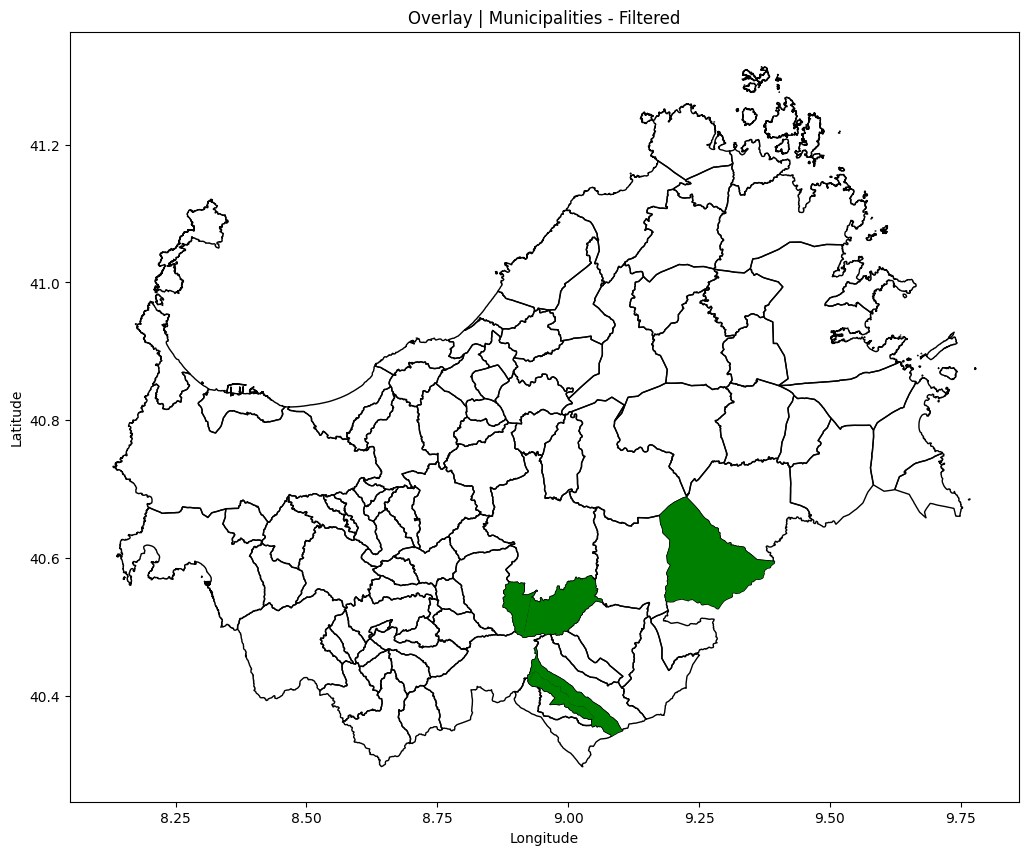

In [39]:
filtered_df = filtered_df.to_crs(epsg=4326)

ax = municipalities_sassari.to_crs(epsg=4326).plot(edgecolor='k', facecolor='none', figsize=(15, 10))
filtered_df.plot(ax=ax,color="green")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Overlay | Municipalities - Filtered')

# save image
# plt.savefig('../figures/geo_stops_sassari.png', bbox_inches='tight', dpi=300)
plt.show()

- Find municipalities with gaps in public transport stops
- Find beaches without public transport stops around

In [40]:
# calculate average population density
avg_pop_density = mun_pop_beach_bus['Population_Density'].mean()
print(avg_pop_density)

51.23015771288467


In [41]:
# calculate average bus stops
avg_bus_stops = mun_pop_beach_bus['Bus_Stops_Count'].mean()
print(avg_bus_stops)

28.83695652173913


In [42]:
# find municipalities with beaches without bus stops
mun_no_stops = mun_pop_beach_bus[mun_pop_beach_bus['Bus_Stops_Count'] <= 3]
mun_no_stops.shape

(22, 7)

In [43]:
# filter municipalities with not enough stops based on population density and number of bus stops
insufficient_stops_mun = mun_pop_gdf[(mun_pop_beach_bus['Population_Density'] > avg_pop_density) & (mun_pop_beach_bus['Bus_Stops_Count'] > avg_bus_stops)]
insufficient_stops_mun.shape

(8, 6)

In [44]:
# filter beaches without stops in a certain radius

# define the search radius in meters
search_radius_meters1 = 5000  # adjust this value according to your requirements

beach_no_stops_5km = []

for beach in beaches_sassari.itertuples():
    beach_point = beach.geometry
    nearby_stops = bus_stops_sassari[bus_stops_sassari.geometry.distance(beach_point) <= search_radius_meters1]
    
    if nearby_stops.empty:
        beach_no_stops_5km.append(beach.idFeature)

print("Beach IDs without nearby bus stops:", beach_no_stops_5km)

Beach IDs without nearby bus stops: [267, 452, 329, 3275, 3434, 2911]


In [45]:
# filter the beaches GeoDataFrame to keep only beaches without nearby bus stops
filtered_beaches_5km = beaches_sassari[beaches_sassari['idFeature'].isin(beach_no_stops_5km)]

# print the filtered beaches GeoDataFrame
print(filtered_beaches_5km.shape)

(6, 6)


In [46]:
# filter beaches without stops in a certain radius

# define the search radius in meters
search_radius_meters2 = 3000  # adjust this value according to your requirements

beach_no_stops_3km = []

for beach in beaches_sassari.itertuples():
    beach_point = beach.geometry
    nearby_stops = bus_stops_sassari[bus_stops_sassari.geometry.distance(beach_point) <= search_radius_meters2]
    
    if nearby_stops.empty:
        beach_no_stops_3km.append(beach.idFeature)

print("Beach IDs without nearby bus stops:", beach_no_stops_3km)

Beach IDs without nearby bus stops: [22, 92, 93, 152, 158, 187, 376, 377, 380, 382, 383, 267, 438, 449, 452, 329, 331, 410, 660, 656, 514, 528, 657, 1766, 2883, 3275, 3434, 2911]


In [47]:
# filter the beaches GeoDataFrame to keep only beaches without nearby bus stops
filtered_beaches_3km = beaches_sassari[beaches_sassari['idFeature'].isin(beach_no_stops_3km)]

# print the filtered beaches GeoDataFrame
print(filtered_beaches_3km.shape)

(28, 6)


_Visualize Results_

In [48]:
mun_pop_beach_bus = mun_pop_beach_bus.to_crs(epsg=4326)
bus_stops_sassari = bus_stops_sassari.to_crs(epsg=4326)
beaches_sassari = beaches_sassari.to_crs(epsg=4326)
insufficient_stops_mun = insufficient_stops_mun.to_crs(epsg=4326)
mun_no_stops = mun_no_stops.to_crs(epsg=4326)
filtered_beaches_5km = filtered_beaches_5km.to_crs(epsg=4326)
filtered_beaches_3km = filtered_beaches_3km.to_crs(epsg=4326)

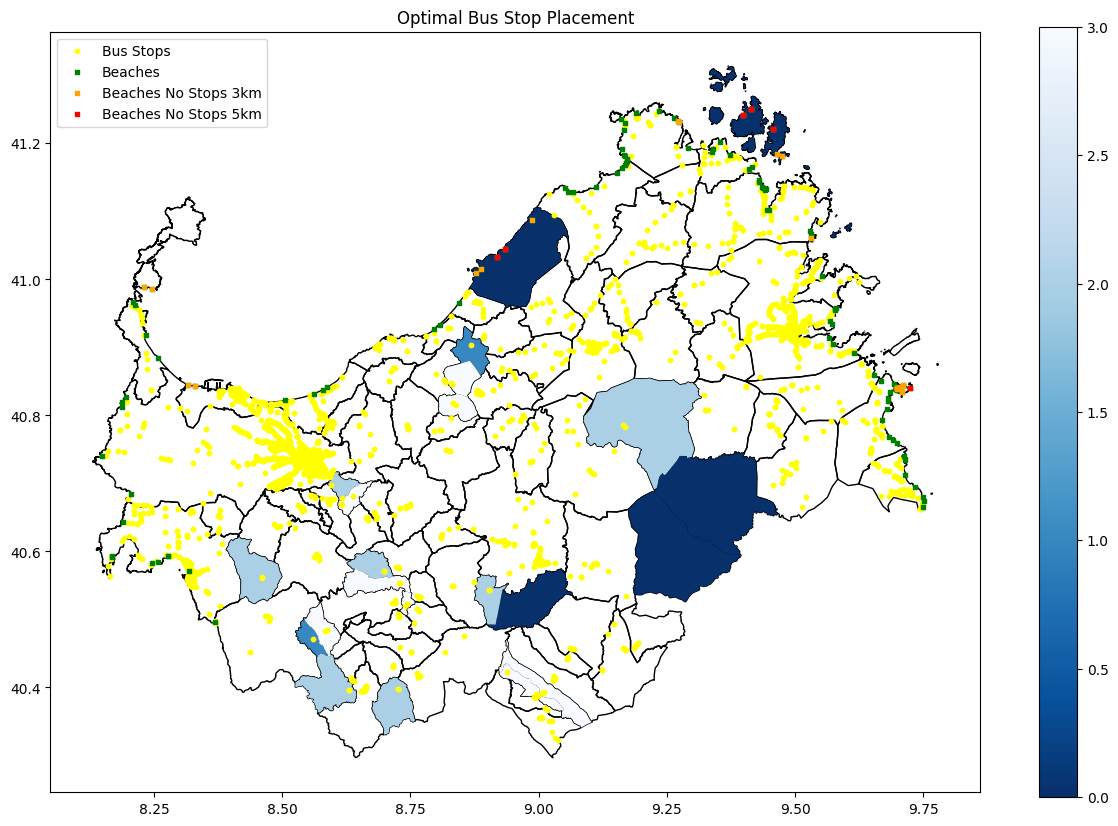

In [49]:
# plot the map
fig, ax = plt.subplots(figsize=(15, 10))
mun_pop_beach_bus.plot(ax=ax, edgecolor='k', facecolor='none')

mun_no_stops.plot(ax=ax, column='Bus_Stops_Count', cmap='Blues_r', legend=True)
# insufficient_stops_mun.plot(ax=ax, color='red')
bus_stops_sassari.plot(ax=ax, color='yellow', marker='o', markersize=10, label='Bus Stops')

beaches_sassari.plot(ax=ax, color='green', marker='s', markersize=10, label='Beaches')
filtered_beaches_3km.plot(ax=ax, color='orange', marker='s', markersize=10, label='Beaches No Stops 3km')
filtered_beaches_5km.plot(ax=ax, color='red', marker='s', markersize=10, label='Beaches No Stops 5km')

plt.legend(loc='upper left')
plt.title('Optimal Bus Stop Placement')

# save image
plt.savefig('../figures/Optimal Bus Stop Placement.png', bbox_inches='tight', dpi=300)
plt.show()